In [ ]:
The objective of this analysis is to predict the number of international flights operating between Australian and international cities using historical data.
This involves understanding what are the factors influencing flights, such as the airline, month, destination region, number of stops, and route. 
Additionally, the analysis aims to explore how flight volumes change over time and across different routes, regions.
These questions are meaningful because they address certain needs of the aviation industry, including demand forecasting, route planning, and resource allocation.
Accurate prediction of flight volumes would helps airlines optimize operations, manage costs, and improve customer satisfaction. 
For policymakers and airport authorities, these insights support infrastructure planning and international travel management.
Considering that air travel patterns have changed significantly over the last few years, the ability to model and forecast flight demand based on
historical and current trends would be incredibly valuable for avaiation companies.

C:\Users\Lavitra Bhavsar\AppData\Local\Temp\ipykernel_21864\842900404.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=45, ha='right') # ha = 'right'
C:\Users\Lavitra Bhavsar\AppData\Local\Temp\ipykernel_21864\842900404.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation=45, ha='right') # ha = 'right'


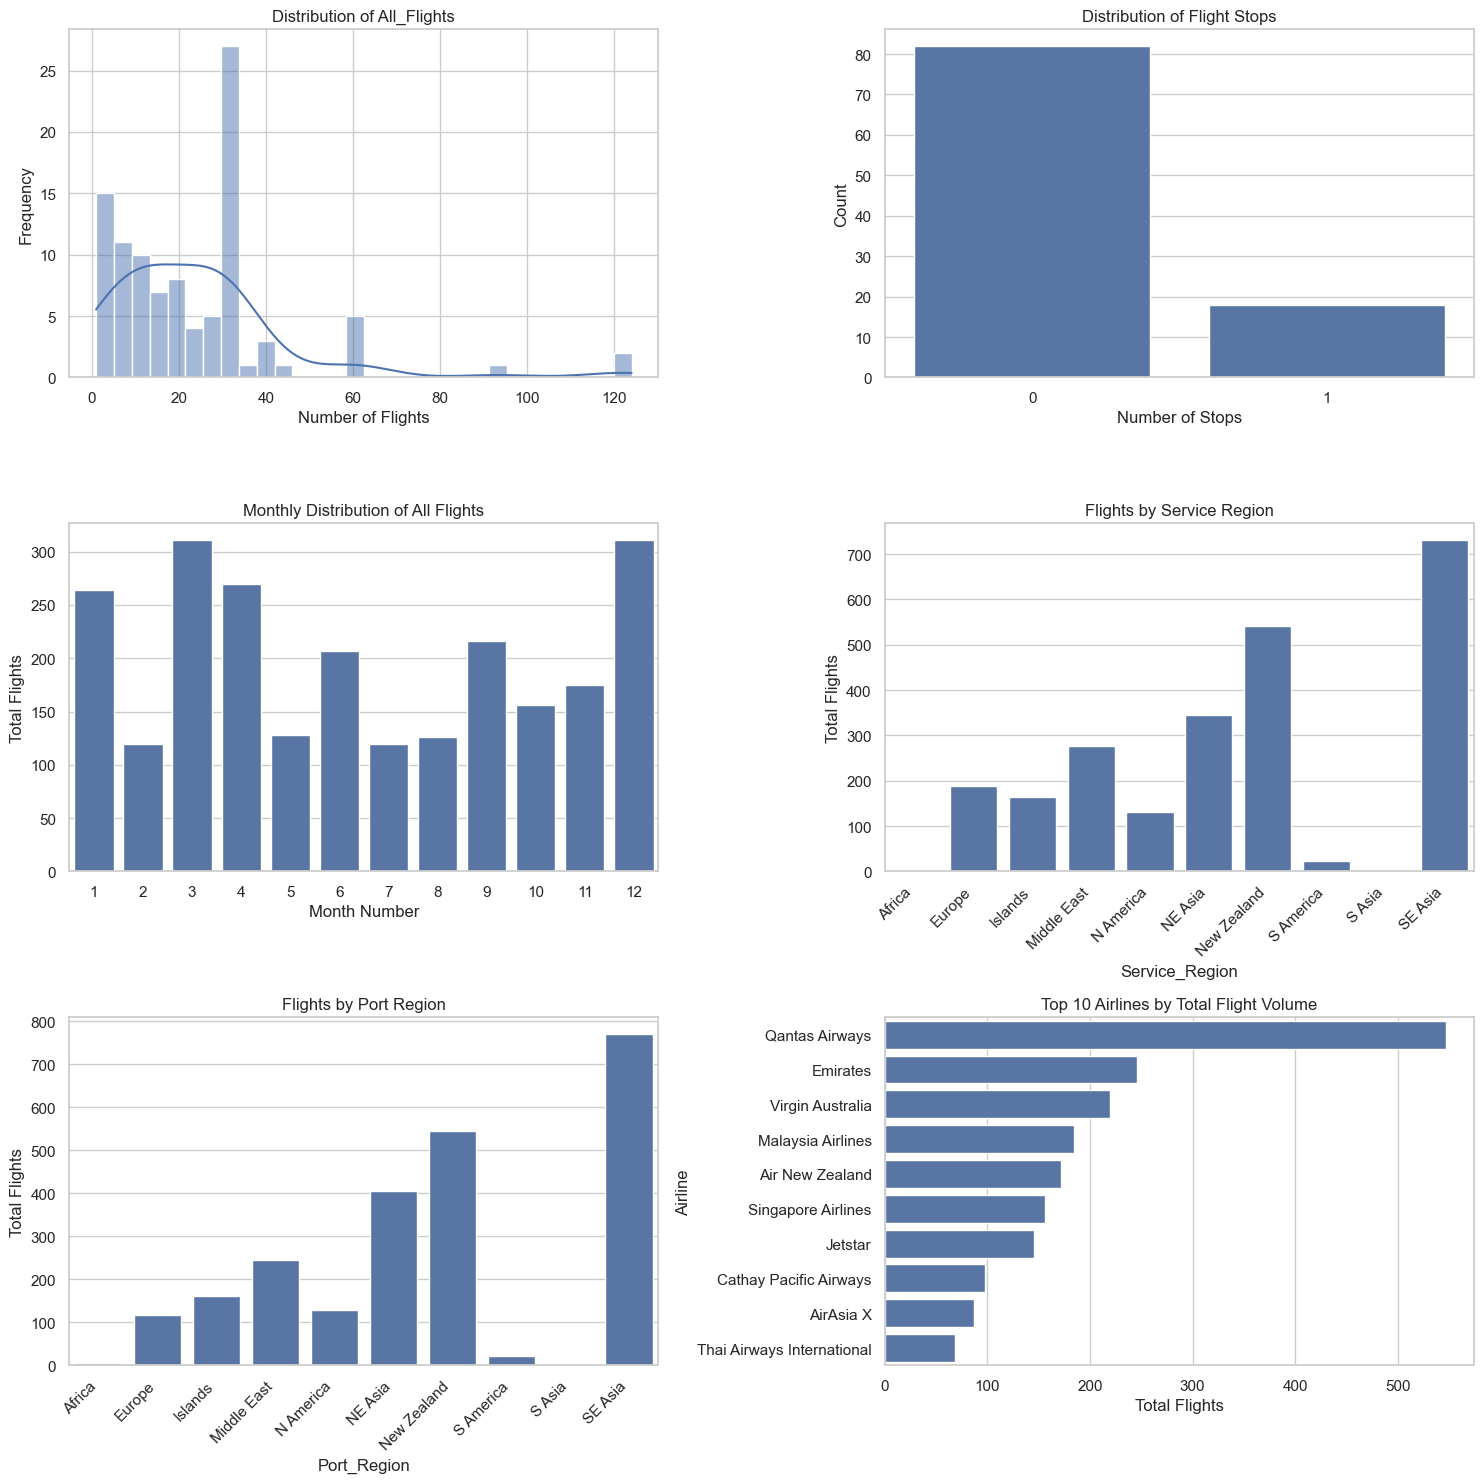

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
df = pd.read_csv("Australian Flights Data.csv")
df_sample = df.sample(n=100, random_state=42) #sample the data
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()
sns.histplot(df_sample['All_Flights'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of All_Flights')
axes[0].set_xlabel('Number of Flights')
axes[0].set_ylabel('Frequency')
sns.countplot(x='Stops', data=df_sample, ax=axes[1])
axes[1].set_title('Distribution of Flight Stops')
axes[1].set_xlabel('Number of Stops')
axes[1].set_ylabel('Count')
monthly_flights = df_sample.groupby("Month_num")["All_Flights"].sum().reset_index()
sns.barplot(data=monthly_flights, x="Month_num", y="All_Flights", ax=axes[2])
axes[2].set_title("Monthly Distribution of All Flights")
axes[2].set_xlabel("Month Number")
axes[2].set_ylabel("Total Flights")
region_flights = df_sample.groupby("Service_Region")["All_Flights"].sum().reset_index()
sns.barplot(data=region_flights, x="Service_Region", y="All_Flights", ax=axes[3])
axes[3].set_title("Flights by Service Region")
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=45, ha='right') # ha = 'right'
axes[3].set_ylabel("Total Flights")
port_region_flights = df_sample.groupby("Port_Region")["All_Flights"].sum().reset_index()
sns.barplot(data=port_region_flights, x="Port_Region", y="All_Flights", ax=axes[4])
axes[4].set_title("Flights by Port Region")
axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation=45, ha='right') # ha = 'right'
axes[4].set_ylabel("Total Flights")
top_airlines = df_sample.groupby("Airline")["All_Flights"].sum().nlargest(10).reset_index()
sns.barplot(data=top_airlines, x="All_Flights", y="Airline", ax=axes[5])
axes[5].set_title("Top 10 Airlines by Total Flight Volume")
axes[5].set_xlabel("Total Flights")
axes[5].set_ylabel("Airline")
plt.tight_layout()
plt.show()


Linear Regression (Baseline) Results:
R² Score: 0.8672758527343795
MAE: 6.081125926757318
MSE: 121.5072977698348


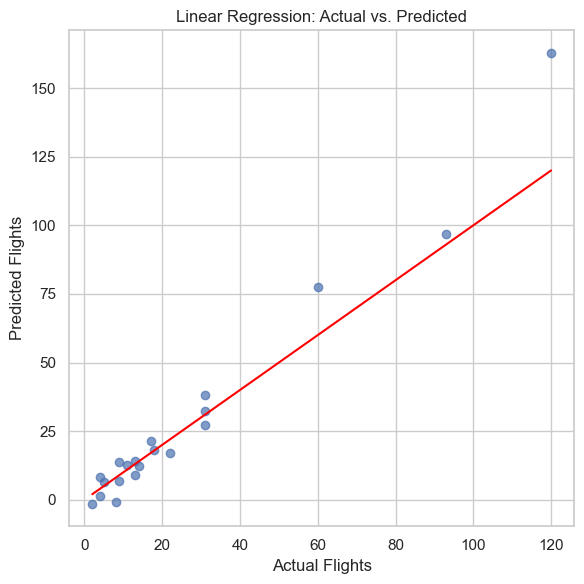

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
# Separate features (X) and target (y)
X = df_sample.drop(columns=["All_Flights", "Month"])  # Drop target and Month
y = df_sample["All_Flights"]
# Identify categorical columns
categorical_cols = X.select_dtypes(include="object").columns.tolist()
# Preprocessor for categorical features: OneHotEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical columns as is
)
# Split data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Linear Regression Model (Baseline) ---
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
lr_pipeline.fit(X_train, y_train)  # Train the model
lr_preds = lr_pipeline.predict(X_test)  # Make predictions on the test set

# --- Model Evaluation Function ---
def evaluate_model(name, y_true, y_pred):
    """
    Evaluates the performance of a regression model.

    Args:
        name (str): Name of the model.
        y_true (array-like): True target values.
        y_pred (array-like): Predicted target values.
    """
    print(f"\n{name} Results:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
# Evaluate the models
evaluate_model("Linear Regression (Baseline)", y_test, lr_preds)
# --- Plotting Predictions ---
fig, axes = plt.subplots(1, 1, figsize=(6, 6))  # 1 row, 1 column
axes.scatter(y_test, lr_preds, alpha=0.7)
axes.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Ideal prediction line
axes.set_title('Linear Regression: Actual vs. Predicted')
axes.set_xlabel('Actual Flights')
axes.set_ylabel('Predicted Flights')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
The selection of Linear Regression was driven by the need to address the problem of predicting flight volumes. Linear Regression was chosen to establish
a baseline understanding of the relationships between the predictor variables (airline, service region) and the target variable. 
Its assumption of a linear relationship provides a starting point for analysis.  The computational efficiency and ease of implementation make it a
practical choice for this purpose.  Specifically, in this case, the Linear Regression model was applied to quantify the degree to which flight volumes
could be explained by a linear combination of the input features.  The resulting metrics (R² Score of 0.867, MAE of 6.081, and MSE of 121.507)
indicate the model's overall fit, average prediction error, and variance of errors, respectively. These values help to understand how well the model
captures the underlying patterns in the flight data using a linear approach.

Advantages and Disadvantages of Each Model:
Linear Regression: 
Advantages: Simplicity and ease of interpretation are key advantages.  The model is computationally efficient and serves as a strong baseline for comparison.
Disadvantages: The assumption of linear relationships is a significant limitation, as real-world data, including flight patterns, often exhibit non-linearities.
Linear Regression can also be sensitive to outliers, which may affect its accuracy.

Random Forest Regressor:
Advantages: This model excels at capturing non-linear relationships and is robust to outliers.
It typically delivers high predictive accuracy and can handle diverse data types.
Disadvantages: Compared to Linear Regression, Random Forest is more complex and less straightforward to interpret.
It can also be computationally intensive, particularly with large datasets, and may be prone to overfitting if not properly tuned.

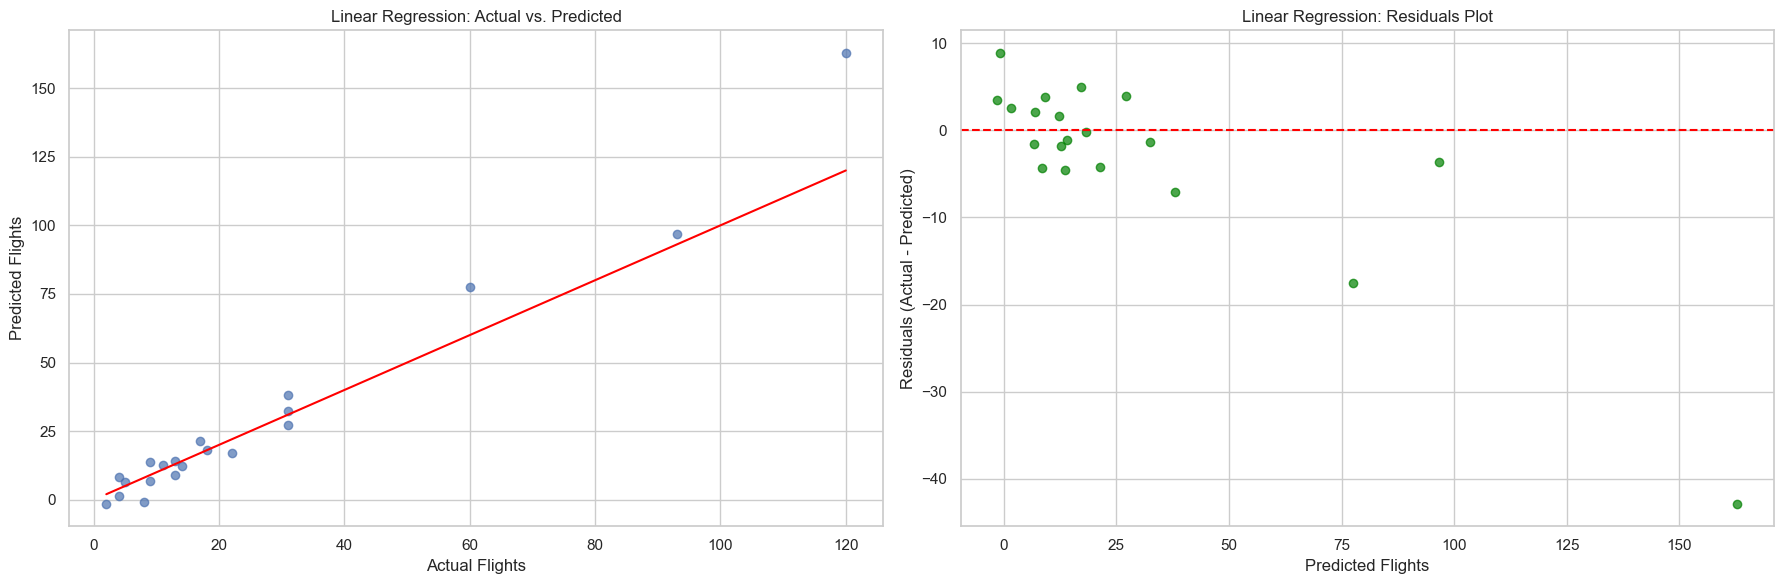


Feature Importance (Linear Regression):
                          Feature  Coefficient  Abs_Coefficient
154       cat__Port_Country_Qatar    -4.899611         4.899611
17   cat__International_City_Doha    -4.899611         4.899611
59     cat__Airline_Qatar Airways    -4.899611         4.899611
183    cat__Service_Country_Qatar    -4.899611         4.899611
84             cat__Route_DOH-SYD    -4.899611         4.899611
..                            ...          ...              ...
19   cat__International_City_Guam    -0.008756         0.008756
143        cat__Port_Country_Guam    -0.008756         0.008756
173     cat__Service_Country_Guam    -0.008756         0.008756
201          remainder__Max_Seats     0.003594         0.003594
199                remainder___id     0.000206         0.000206

[204 rows x 3 columns]


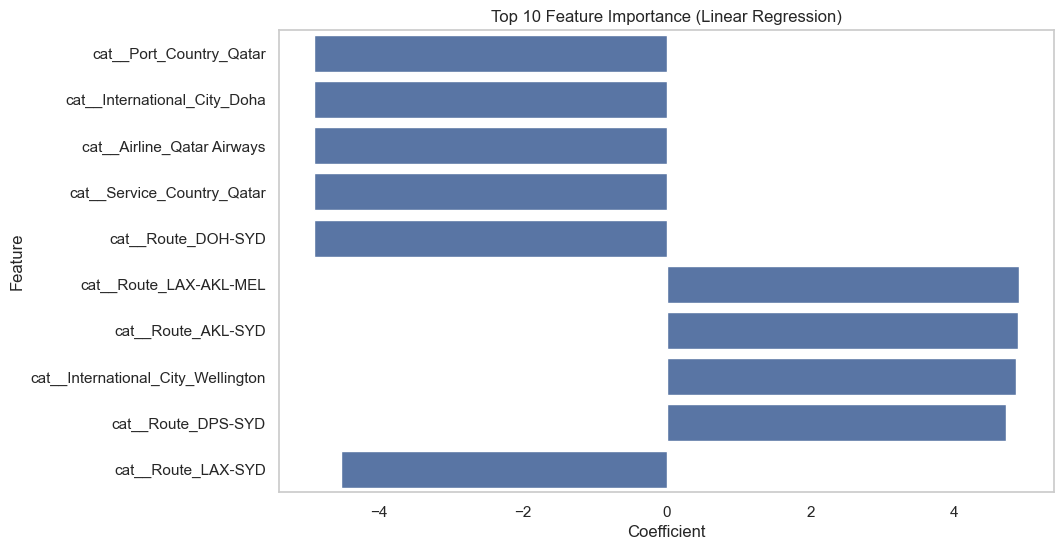

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns, increased figure size
# Left plot: Actual vs. Predicted
axes[0].scatter(y_test, lr_preds, alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
axes[0].set_title('Linear Regression: Actual vs. Predicted')
axes[0].set_xlabel('Actual Flights')
axes[0].set_ylabel('Predicted Flights')
axes[0].grid(True)  # Add gridlines
# Right plot: Residuals plot
residuals = y_test - lr_preds
axes[1].scatter(lr_preds, residuals, alpha=0.7, color='green')  # Changed color
axes[1].axhline(y=0, color='red', linestyle='--')  # Added a horizontal line at y=0
axes[1].set_title('Linear Regression: Residuals Plot')
axes[1].set_xlabel('Predicted Flights')
axes[1].set_ylabel('Residuals (Actual - Predicted)')
axes[1].grid(True)  # Add gridlines
plt.tight_layout()
plt.show()
if hasattr(lr_pipeline.named_steps['model'], 'coef_'):  # Check if the model has coefficients
    coefficients = lr_pipeline.named_steps['model'].coef_
    feature_names = lr_pipeline.named_steps['preprocessor'].get_feature_names_out()
    # Create a DataFrame to hold feature names and their corresponding coefficients
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    # Sort the DataFrame by the absolute value of the coefficients
    feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
    feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)
    # Print the feature importance
    print("\nFeature Importance (Linear Regression):")
    print(feature_importance)
    # Visualize feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))  # Show top 10
    plt.title('Top 10 Feature Importance (Linear Regression)')
    plt.xlabel('Coefficient')
    plt.ylabel('Feature')
    plt.grid(axis='x')
    plt.show()
else:
    print("\nLinear Regression model does not have coefficients to display feature importance.")